In [80]:
# Import statements
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from itertools import compress, product

In [9]:
# Training, validation and test data
trainingDataFile = 'C:/Users/nicholas.rekstad/MastersModuleProject/data_training.csv'
trainingDataFileAddedFeatures = 'C:/Users/nicholas.rekstad/MastersModuleProject/data_added features_training.csv'
validationDataFile = 'C:/Users/nicholas.rekstad/MastersModuleProject/data_validation.csv'
validationDataFileAddedFeatures = 'C:/Users/nicholas.rekstad/MastersModuleProject/data_added features_validation.csv'
testDataFile = 'C:/Users/nicholas.rekstad/MastersModuleProject/data_test.csv'
testDataFileAddedFeatures = 'C:/Users/nicholas.rekstad/MastersModuleProject/data_added features_test.csv'

In [10]:
# Create Pandas dataframe for training data
trainingDataFrame = pd.read_csv(trainingDataFile)
trainingDataAddedFeatures = pd.read_csv(trainingDataFileAddedFeatures)
validationDataFrame = pd.read_csv(validationDataFileAddedFeatures)
testDataFrame = pd.read_csv(testDataFileAddedFeatures)

In [11]:
trainingDataAddedFeatures.head()

,date,DayOfWeek,TimeOfDay,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,04/02/2015 17:51,4,17.0,23.18,27.2720,426.0,721.25,0.004793,1
1,04/02/2015 17:51,4,17.0,23.15,27.2675,429.5,714.00,0.004783,1
2,04/02/2015 17:53,4,17.0,23.15,27.2450,426.0,713.50,0.004779,1
3,04/02/2015 17:54,4,17.0,23.15,27.2000,426.0,708.25,0.004772,1
4,04/02/2015 17:55,4,17.0,23.10,27.2000,426.0,704.50,0.004757,1


In [12]:
trainingDataAddedFeatures.describe()

,DayOfWeek,TimeOfDay,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,4.106349,11.390642,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,2.198733,7.092195,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,1.000000,0.000000,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,2.000000,5.000000,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,5.000000,11.000000,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,6.000000,18.000000,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,7.000000,23.000000,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


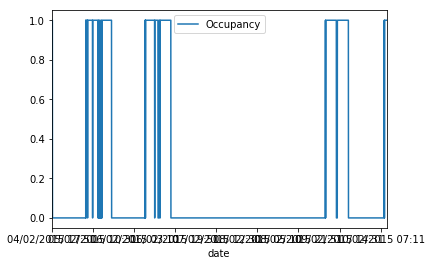

In [13]:
trainingDataAddedFeatures.plot('date','Occupancy')

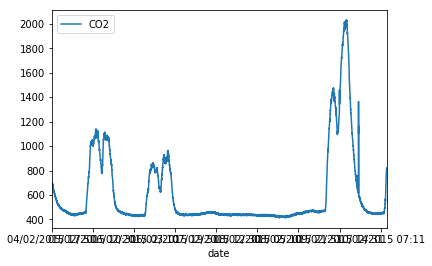

In [14]:
trainingDataAddedFeatures.plot('date','CO2')

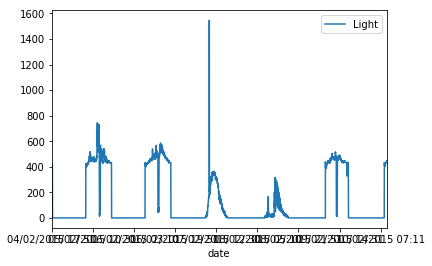

In [15]:
trainingDataAddedFeatures.plot('date','Light')

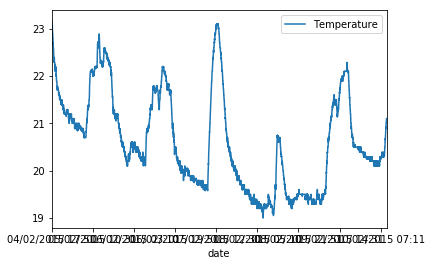

In [16]:
trainingDataAddedFeatures.plot('date','Temperature')

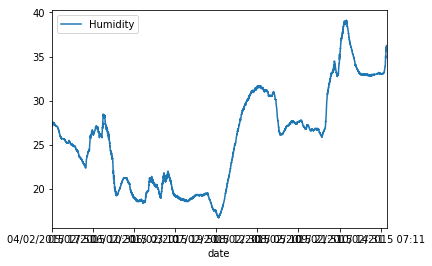

In [17]:
trainingDataAddedFeatures.plot('date','Humidity')

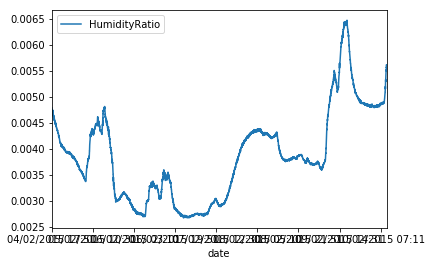

In [18]:
trainingDataAddedFeatures.plot('date','HumidityRatio')

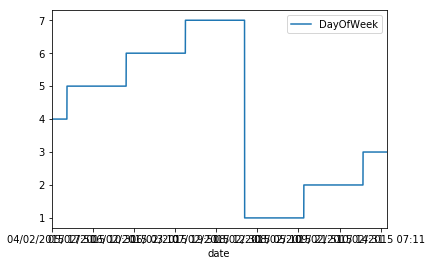

In [114]:
trainingDataAddedFeatures.plot('date','DayOfWeek')

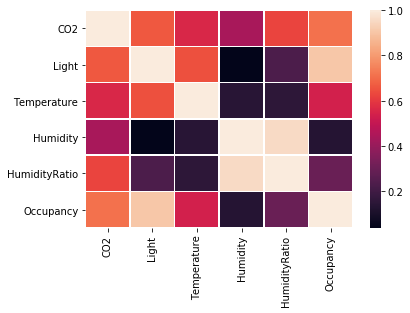

In [86]:
attributes = ['CO2','Light','Temperature','Humidity','HumidityRatio', 'Occupancy']
#attributes = ['DayOfWeek','TimeOfDay','Temperature','Occupancy']
sns.heatmap(trainingDataFrame[attributes].corr().abs(), linewidths = .5)
plt.show()

In [19]:
#Generic function for making a classification model and assessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Training Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=4)
  error = []
  for train, test in kf.split(np.array(data)):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [20]:
# Generic function for assessing the accuracy of the predictions
def prediction_model(model, data, predictors, outcome):
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  #print(accuracy)
  print ("Accuracy: %s" % "{0:.3%}".format(accuracy))
  return accuracy

In [105]:
# Function that streamlines the training, validation and testing of a model
def trainValidateTestClassificationModel(model, trainingData, validationData, testData, predictors, outcome):
    classification_model(model, trainingData, predictors, outcome)
    print("\n=== Validation ===\n")
    validation = prediction_model(model, validationData, predictors, outcome)
    print("\n=== Testing ===\n")
    test = prediction_model(model, testData, predictors, outcome)
    
    #print(validation)
    #print(test)
    
    score = validation * test
    
    
    return score

In [22]:
# Finds all possible of non-arbitrary combinations of inputs
def combinations(items):
    return ( set(compress(items,mask)) for mask in product(*[[0,1]]*len(items)) )

In [26]:
# Prepares combinations in format for use with algorithm
def prepareRuns(options):
    runs = []
    batch = list(combinations(options))
    batch.pop(0)
    for x in batch:
        y = list(x)
        runs.append(y)
    return runs

[['HumidityRatio'],
 ['Humidity'],
 ['Humidity', 'HumidityRatio'],
 ['Temperature'],
 ['Temperature', 'HumidityRatio'],
 ['Temperature', 'Humidity'],
 ['Temperature', 'Humidity', 'HumidityRatio'],
 ['Light'],
 ['Light', 'HumidityRatio'],
 ['Light', 'Humidity'],
 ['Light', 'Humidity', 'HumidityRatio'],
 ['Light', 'Temperature'],
 ['Light', 'Temperature', 'HumidityRatio'],
 ['Light', 'Temperature', 'Humidity'],
 ['Light', 'Temperature', 'Humidity', 'HumidityRatio'],
 ['CO2'],
 ['CO2', 'HumidityRatio'],
 ['CO2', 'Humidity'],
 ['CO2', 'Humidity', 'HumidityRatio'],
 ['Temperature', 'CO2'],
 ['Temperature', 'CO2', 'HumidityRatio'],
 ['Temperature', 'CO2', 'Humidity'],
 ['Temperature', 'CO2', 'Humidity', 'HumidityRatio'],
 ['Light', 'CO2'],
 ['Light', 'CO2', 'HumidityRatio'],
 ['Light', 'CO2', 'Humidity'],
 ['Light', 'CO2', 'Humidity', 'HumidityRatio'],
 ['Light', 'Temperature', 'CO2'],
 ['Light', 'Temperature', 'CO2', 'HumidityRatio'],
 ['Light', 'Temperature', 'CO2', 'Humidity'],
 ['Light',

In [79]:
# Scaling data
scaler = StandardScaler().fit(trainingDataAddedFeatures.loc[:,['DayOfWeek','TimeOfDay','CO2','Light','Temperature','Humidity','HumidityRatio']])
scaledTrainingDataSet = pd.DataFrame(scaler.transform(trainingDataAddedFeatures.loc[:,['DayOfWeek','TimeOfDay','CO2','Light','Temperature','Humidity','HumidityRatio']]),columns = trainingDataAddedFeatures.loc[:,['DayOfWeek','TimeOfDay','CO2','Light','Temperature','Humidity','HumidityRatio']].columns)
scaledTrainingDataSet.insert(7,"Occupancy",trainingDataAddedFeatures.loc[:,'Occupancy'])

scaler = StandardScaler().fit(trainingDataAddedFeatures.loc[:,['DayOfWeek','TimeOfDay','CO2','Light','Temperature','Humidity','HumidityRatio']])
scaledValidationDataSet = pd.DataFrame(scaler.transform(validationDataFrame.loc[:,['DayOfWeek','TimeOfDay','CO2','Light','Temperature','Humidity','HumidityRatio']]),columns = validationDataFrame.loc[:,['DayOfWeek','TimeOfDay','CO2','Light','Temperature','Humidity','HumidityRatio']].columns)
scaledValidationDataSet.insert(7,"Occupancy",validationDataFrame.loc[:,'Occupancy'])

scaler = StandardScaler().fit(trainingDataAddedFeatures.loc[:,['DayOfWeek','TimeOfDay','CO2','Light','Temperature','Humidity','HumidityRatio']])
scaledTestDataSet = pd.DataFrame(scaler.transform(testDataFrame.loc[:,['DayOfWeek','TimeOfDay','CO2','Light','Temperature','Humidity','HumidityRatio']]),columns = testDataFrame.loc[:,['DayOfWeek','TimeOfDay','CO2','Light','Temperature','Humidity','HumidityRatio']].columns)
scaledTestDataSet.insert(7,"Occupancy",testDataFrame.loc[:,'Occupancy'])
scaledTrainingDataSet.head()

,DayOfWeek,TimeOfDay,CO2,Light,Temperature,Humidity,HumidityRatio,Occupancy
0,-0.048371,0.790968,0.364948,1.573763,2.518470,0.278526,1.091757,1
1,-0.048371,0.790968,0.341881,1.591735,2.488967,0.277713,1.080555,1
2,-0.048371,0.790968,0.340290,1.573763,2.488967,0.273645,1.075889,1
3,-0.048371,0.790968,0.323587,1.573763,2.488967,0.265508,1.066555,1
4,-0.048371,0.790968,0.311655,1.573763,2.439796,0.265508,1.049523,1


In [73]:
# Scaled data test
modelKNearestNeighborsScaled = KNeighborsClassifier(n_neighbors=15)
predictor_var = ['DayOfWeek','TimeOfDay','Temperature']
outcome_var = 'Occupancy'
classification_model(modelKNearestNeighborsScaled, scaledTrainingDataSet, predictor_var, outcome_var)

Training Accuracy : 98.649%
Cross-Validation Score : 82.929%


In [77]:
# Testing all model types with scaled variables
modelLogRegress = LogisticRegression(solver='newton-cg')
modelDecisionTree = DecisionTreeClassifier()
modelRandomForest = RandomForestClassifier(n_estimators=100)
modelNaiveBayes = GaussianNB()
modelStochGradDesc = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
modelKNearestNeighbors = KNeighborsClassifier(n_neighbors=15)
modelSupportVectors = SVC(kernel="linear", C=0.025, random_state=101)

modelList = [modelLogRegress,
             modelDecisionTree,
             modelRandomForest,
             modelNaiveBayes,
             modelStochGradDesc,
             modelKNearestNeighbors,
             modelSupportVectors
            ]

modelResultsList = []

# Desired inputs and outputs
#predictor_var = ['DayOfWeek','TimeOfDay','CO2','Light','Temperature','Humidity','HumidityRatio']
predictor_var = ['DayOfWeek','TimeOfDay','Temperature']
outcome_var = 'Occupancy'

# Execute models
modelResultsList.append([trainValidateTestClassificationModel(modelLogRegress, scaledTrainingDataSet, scaledValidationDataSet, scaledTestDataSet, predictor_var, outcome_var),"Logistic Regression"])

modelResultsList.append([trainValidateTestClassificationModel(modelDecisionTree, scaledTrainingDataSet, scaledValidationDataSet, scaledTestDataSet, predictor_var, outcome_var),"Decision Tree"])

modelResultsList.append([trainValidateTestClassificationModel(modelRandomForest, scaledTrainingDataSet, scaledValidationDataSet, scaledTestDataSet, predictor_var, outcome_var),"Random Forest"])

modelResultsList.append([trainValidateTestClassificationModel(modelNaiveBayes, scaledTrainingDataSet, scaledValidationDataSet, scaledTestDataSet, predictor_var, outcome_var),"Naïve Bayes"])

modelResultsList.append([trainValidateTestClassificationModel(modelStochGradDesc, scaledTrainingDataSet, scaledValidationDataSet, scaledTestDataSet, predictor_var, outcome_var),"Stochastic Gradient Descent"])

modelResultsList.append([trainValidateTestClassificationModel(modelKNearestNeighbors, scaledTrainingDataSet, scaledValidationDataSet, scaledTestDataSet, predictor_var, outcome_var),"K-Nearest Neighbours"])

modelResultsList.append([trainValidateTestClassificationModel(modelSupportVectors, scaledTrainingDataSet, scaledValidationDataSet, scaledTestDataSet, predictor_var, outcome_var),"Support Vector Machine"])

modelResultsList.sort()

for result in modelResultsList:
    print(result)

Training Accuracy : 83.655%
Cross-Validation Score : 79.245%

=== Validation ===

Accuracy: 86.417%

=== Testing ===

Accuracy: 90.258%
Training Accuracy : 99.104%
Cross-Validation Score : 81.973%

=== Validation ===

Accuracy: 90.844%

=== Testing ===

Accuracy: 88.864%
Training Accuracy : 99.104%
Cross-Validation Score : 82.499%

=== Validation ===

Accuracy: 93.959%

=== Testing ===

Accuracy: 87.551%
Training Accuracy : 87.142%
Cross-Validation Score : 82.253%

=== Validation ===

Accuracy: 87.805%

=== Testing ===

Accuracy: 85.418%
Training Accuracy : 81.604%
Cross-Validation Score : 77.600%

=== Validation ===

Accuracy: 85.216%

=== Testing ===

Accuracy: 88.074%
Training Accuracy : 98.649%
Cross-Validation Score : 82.929%

=== Validation ===

Accuracy: 86.829%

=== Testing ===

Accuracy: 80.425%
Training Accuracy : 84.244%
Cross-Validation Score : 77.931%

=== Validation ===

Accuracy: 85.553%

=== Testing ===

Accuracy: 90.217%
[0.6983202945236999, 'K-Nearest Neighbours']
[0.

In [31]:
# Testing all model types without added parameters
modelLogRegress = LogisticRegression(solver='newton-cg')
modelDecisionTree = DecisionTreeClassifier()
modelRandomForest = RandomForestClassifier(n_estimators=100)
modelNaiveBayes = GaussianNB()
modelStochGradDesc = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
modelKNearestNeighbors = KNeighborsClassifier(n_neighbors=15)
modelSupportVectors = SVC(kernel="linear", C=0.025, random_state=101)

modelList = [modelLogRegress,
             modelDecisionTree,
             modelRandomForest,
             modelNaiveBayes,
             modelStochGradDesc,
             modelKNearestNeighbors,
             modelSupportVectors
            ]

modelResultsList = []

# Desired inputs and outputs
#predictor_var = ['DayOfWeek','TimeOfDay','CO2','Light','Temperature','Humidity','HumidityRatio']
predictor_var = ['Temperature']
outcome_var = 'Occupancy'

# Execute models
modelResultsList.append([trainValidateTestClassificationModel(modelLogRegress, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),"Logistic Regression"])

modelResultsList.append([trainValidateTestClassificationModel(modelDecisionTree, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),"Decision Tree"])

modelResultsList.append([trainValidateTestClassificationModel(modelRandomForest, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),"Random Forest"])

modelResultsList.append([trainValidateTestClassificationModel(modelNaiveBayes, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),"Naïve Bayes"])

modelResultsList.append([trainValidateTestClassificationModel(modelStochGradDesc, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),"Stochastic Gradient Descent"])

modelResultsList.append([trainValidateTestClassificationModel(modelKNearestNeighbors, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),"K-Nearest Neighbours"])

modelResultsList.append([trainValidateTestClassificationModel(modelSupportVectors, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),"Support Vector Machine"])

modelResultsList.sort()

for result in modelResultsList:
    print(result)

Training Accuracy : 82.402%
Cross-Validation Score : 80.719%

=== Validation ===

Accuracy: 85.328%

=== Testing ===

Accuracy: 82.763%
Training Accuracy : 87.867%
Cross-Validation Score : 76.667%

=== Validation ===

Accuracy: 71.295%

=== Testing ===

Accuracy: 85.306%
Training Accuracy : 87.867%
Cross-Validation Score : 76.778%

=== Validation ===

Accuracy: 70.694%

=== Testing ===

Accuracy: 85.357%
Training Accuracy : 84.195%
Cross-Validation Score : 82.942%

=== Validation ===

Accuracy: 84.878%

=== Testing ===

Accuracy: 85.131%
Training Accuracy : 77.060%
Cross-Validation Score : 81.517%

=== Validation ===

Accuracy: 83.715%

=== Testing ===

Accuracy: 78.558%
Training Accuracy : 85.018%
Cross-Validation Score : 77.331%

=== Validation ===

Accuracy: 66.379%

=== Testing ===

Accuracy: 82.106%
Training Accuracy : 84.355%
Cross-Validation Score : 78.336%

=== Validation ===

Accuracy: 85.666%

=== Testing ===

Accuracy: 84.393%
[0.5450128669425774, 'K-Nearest Neighbours']
[0.

In [32]:
# Testing all model types with added parameters
modelLogRegress = LogisticRegression(solver='newton-cg')
modelDecisionTree = DecisionTreeClassifier()
modelRandomForest = RandomForestClassifier(n_estimators=100)
modelNaiveBayes = GaussianNB()
modelStochGradDesc = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
modelKNearestNeighbors = KNeighborsClassifier(n_neighbors=15)
modelSupportVectors = SVC(kernel="linear", C=0.025, random_state=101)

modelList = [modelLogRegress,
             modelDecisionTree,
             modelRandomForest,
             modelNaiveBayes,
             modelStochGradDesc,
             modelKNearestNeighbors,
             modelSupportVectors
            ]

modelResultsList = []

# Desired inputs and outputs
#predictor_var = ['DayOfWeek','TimeOfDay','CO2','Light','Temperature','Humidity','HumidityRatio']
predictor_var = ['DayOfWeek','TimeOfDay','Temperature']
outcome_var = 'Occupancy'

# Execute models
modelResultsList.append([trainValidateTestClassificationModel(modelLogRegress, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),"Logistic Regression"])

modelResultsList.append([trainValidateTestClassificationModel(modelDecisionTree, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),"Decision Tree"])

modelResultsList.append([trainValidateTestClassificationModel(modelRandomForest, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),"Random Forest"])

modelResultsList.append([trainValidateTestClassificationModel(modelNaiveBayes, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),"Naïve Bayes"])

modelResultsList.append([trainValidateTestClassificationModel(modelStochGradDesc, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),"Stochastic Gradient Descent"])

modelResultsList.append([trainValidateTestClassificationModel(modelKNearestNeighbors, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),"K-Nearest Neighbours"])

modelResultsList.append([trainValidateTestClassificationModel(modelSupportVectors, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),"Support Vector Machine"])

modelResultsList.sort()

for result in modelResultsList:
    print(result)

Training Accuracy : 83.642%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 79.245%

=== Validation ===

Accuracy: 86.417%

=== Testing ===

Accuracy: 90.258%
Training Accuracy : 99.104%
Cross-Validation Score : 82.071%

=== Validation ===

Accuracy: 90.844%

=== Testing ===

Accuracy: 88.864%
Training Accuracy : 99.104%
Cross-Validation Score : 81.688%

=== Validation ===

Accuracy: 94.522%

=== Testing ===

Accuracy: 87.541%
Training Accuracy : 87.142%
Cross-Validation Score : 82.253%

=== Validation ===

Accuracy: 87.805%

=== Testing ===

Accuracy: 85.418%
Training Accuracy : 83.556%
Cross-Validation Score : 69.667%

=== Validation ===

Accuracy: 86.942%

=== Testing ===

Accuracy: 90.894%
Training Accuracy : 98.416%
Cross-Validation Score : 78.840%

=== Validation ===

Accuracy: 95.310%

=== Testing ===

Accuracy: 87.726%
Training Accuracy : 84.281%
Cross-Validation Score : 78.422%

=== Validation ===

Accuracy: 85.478%

=== Testing ===

Accuracy: 90.207%
[0.7500150063026471, 'Naïve Bayes']
[0.7710763905455675, 'Support Vector Mac

In [27]:
# Evaluating logistic regression models for all combinations of inputs to explore best/worst predictors of occupancy

# Desired inputs and outputs
predictor_var = ['DayOfWeek','TimeOfDay','CO2','Light','Temperature','Humidity','HumidityRatio']
outcome_var = 'Occupancy'

# Generate permutations of inputs
runs = prepareRuns(predictor_var)
counter = 0
results = []
for run in runs:
    counter += 1
    print('=============================')
    print('Run: '+str(counter))
    print(run)
    print('=============================')
    
    # Testing all model types with all variables
    modelLogRegression = LogisticRegression(solver='newton-cg')

    # Execute models
    score = trainValidateTestClassificationModel(modelLogRegression, trainingDataAddedFeatures, validationDataFrame, testDataFrame, run, outcome_var)
    results.append([score,run])

print(results)

Run: 1
['HumidityRatio']
Training Accuracy : 78.767%
Cross-Validation Score : 78.766%

=== Validation ===

Accuracy: 63.527%

=== Testing ===

Accuracy: 78.989%
Run: 2
['Humidity']
Training Accuracy : 78.767%
Cross-Validation Score : 78.766%

=== Validation ===

Accuracy: 63.527%

=== Testing ===

Accuracy: 78.989%
Run: 3
['Humidity', 'HumidityRatio']
Training Accuracy : 78.767%
Cross-Validation Score : 78.766%

=== Validation ===

Accuracy: 63.527%

=== Testing ===

Accuracy: 78.989%
Run: 4
['Temperature']
Training Accuracy : 82.402%
Cross-Validation Score : 80.719%

=== Validation ===

Accuracy: 85.328%

=== Testing ===

Accuracy: 82.763%
Run: 5
['Temperature', 'HumidityRatio']
Training Accuracy : 82.402%
Cross-Validation Score : 80.719%

=== Validation ===

Accuracy: 85.328%

=== Testing ===

Accuracy: 82.763%
Run: 6
['Temperature', 'Humidity']
Training Accuracy : 83.286%
Cross-Validation Score : 82.156%

=== Validation ===

Accuracy: 86.079%

=== Testing ===

Accuracy: 84.516%
Run:

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 87.032%

=== Validation ===

Accuracy: 87.242%

=== Testing ===

Accuracy: 78.671%
Run: 18
['CO2', 'Humidity']
Training Accuracy : 92.570%
Cross-Validation Score : 92.386%

=== Validation ===

Accuracy: 87.955%

=== Testing ===

Accuracy: 75.974%
Run: 19
['CO2', 'Humidity', 'HumidityRatio']
Training Accuracy : 92.570%
Cross-Validation Score : 92.386%

=== Validation ===

Accuracy: 87.955%

=== Testing ===

Accuracy: 75.974%
Run: 20
['Temperature', 'CO2']
Training Accuracy : 91.023%
Cross-Validation Score : 88.063%

=== Validation ===

Accuracy: 87.280%

=== Testing ===

Accuracy: 81.050%
Run: 21
['Temperature', 'CO2', 'HumidityRatio']
Training Accuracy : 91.023%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 88.063%

=== Validation ===

Accuracy: 87.280%

=== Testing ===

Accuracy: 81.050%
Run: 22
['Temperature', 'CO2', 'Humidity']
Training Accuracy : 92.533%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 90.470%

=== Validation ===

Accuracy: 88.293%

=== Testing ===

Accuracy: 77.051%
Run: 23
['Temperature', 'CO2', 'Humidity', 'HumidityRatio']
Training Accuracy : 92.533%
Cross-Validation Score : 90.470%

=== Validation ===

Accuracy: 88.293%

=== Testing ===

Accuracy: 77.051%
Run: 24
['Light', 'CO2']
Training Accuracy : 98.833%
Cross-Validation Score : 98.330%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 99.313%
Run: 25
['Light', 'CO2', 'HumidityRatio']
Training Accuracy : 98.833%
Cross-Validation Score : 98.330%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 99.313%
Run: 26
['Light', 'CO2', 'Humidity']
Training Accuracy : 98.809%
Cross-Validation Score : 97.752%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 99.118%
Run: 27
['Light', 'CO2', 'Humidity', 'HumidityRatio']
Training Accuracy : 98.809%
Cross-Validation Score : 97.752%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 99

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 97.655%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 99.262%
Run: 42
['TimeOfDay', 'Humidity', 'Light']
Training Accuracy : 98.797%
Cross-Validation Score : 98.674%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 98.841%
Run: 43
['TimeOfDay', 'Humidity', 'Light', 'HumidityRatio']
Training Accuracy : 98.797%
Cross-Validation Score : 98.674%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 98.841%
Run: 44
['TimeOfDay', 'Temperature', 'Light']
Training Accuracy : 98.711%
Cross-Validation Score : 98.588%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 99.303%
Run: 45
['TimeOfDay', 'Temperature', 'Light', 'HumidityRatio']
Training Accuracy : 98.711%
Cross-Validation Score : 98.588%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 99.303%
Run: 46
['TimeOfDay', 'Temperature', 'Humidity', 'Light']
Training Accuracy : 98.674%
Cross-Validation Score : 98.379%

=== Validation =

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Training Accuracy : 90.925%
Cross-Validation Score : 87.081%

=== Validation ===

Accuracy: 87.692%

=== Testing ===

Accuracy: 73.370%
Run: 50
['TimeOfDay', 'CO2', 'Humidity']


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Training Accuracy : 93.197%
Cross-Validation Score : 92.508%

=== Validation ===

Accuracy: 88.255%

=== Testing ===

Accuracy: 72.436%
Run: 51
['TimeOfDay', 'CO2', 'Humidity', 'HumidityRatio']
Training Accuracy : 93.197%
Cross-Validation Score : 92.508%

=== Validation ===

Accuracy: 88.255%

=== Testing ===

Accuracy: 72.436%
Run: 52
['TimeOfDay', 'Temperature', 'CO2']


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Training Accuracy : 92.411%
Cross-Validation Score : 88.419%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')



=== Validation ===

Accuracy: 89.343%

=== Testing ===

Accuracy: 78.117%
Run: 53
['TimeOfDay', 'Temperature', 'CO2', 'HumidityRatio']
Training Accuracy : 92.411%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 88.419%

=== Validation ===

Accuracy: 89.343%

=== Testing ===

Accuracy: 78.117%
Run: 54
['TimeOfDay', 'Temperature', 'CO2', 'Humidity']
Training Accuracy : 93.418%
Cross-Validation Score : 90.261%

=== Validation ===

Accuracy: 89.644%

=== Testing ===

Accuracy: 73.441%
Run: 55
['Humidity', 'Temperature', 'TimeOfDay', 'CO2', 'HumidityRatio']
Training Accuracy : 93.418%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 90.261%

=== Validation ===

Accuracy: 89.644%

=== Testing ===

Accuracy: 73.441%
Run: 56
['TimeOfDay', 'CO2', 'Light']
Training Accuracy : 98.833%
Cross-Validation Score : 98.244%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 98.687%
Run: 57
['TimeOfDay', 'CO2', 'Light', 'HumidityRatio']
Training Accuracy : 98.833%
Cross-Validation Score : 98.244%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 98.687%
Run: 58
['TimeOfDay', 'CO2', 'Humidity', 'Light']
Training Accuracy : 98.833%
Cross-Validation Score : 97.814%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 99.087%
Run: 59
['Light', 'Humidity', 'TimeOfDay', 'CO2', 'HumidityRatio']
Training Accuracy : 98.833%
Cross-Validation Score : 97.814%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 99.087%
Run: 60
['TimeOfDay', 'Temperature', 'CO2', 'Light']
Training Accuracy : 98.600%
Cross-Validation Score : 98.219%

=== Validation ===

Acc

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Training Accuracy : 83.581%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 78.828%

=== Validation ===

Accuracy: 84.428%

=== Testing ===

Accuracy: 88.966%
Run: 69
['Temperature', 'HumidityRatio', 'DayOfWeek']


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Training Accuracy : 83.581%
Cross-Validation Score : 78.828%

=== Validation ===

Accuracy: 84.428%

=== Testing ===

Accuracy: 88.966%
Run: 70
['Temperature', 'Humidity', 'DayOfWeek']
Training Accuracy : 83.409%
Cross-Validation Score : 81.935%

=== Validation ===

Accuracy: 85.779%

=== Testing ===

Accuracy: 82.465%
Run: 71
['Temperature', 'HumidityRatio', 'Humidity', 'DayOfWeek']
Training Accuracy : 83.409%
Cross-Validation Score : 81.935%

=== Validation ===

Accuracy: 85.779%

=== Testing ===

Accuracy: 82.465%
Run: 72
['Light', 'DayOfWeek']
Training Accuracy : 98.711%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 98.195%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 99.364%
Run: 73
['Light', 'HumidityRatio', 'DayOfWeek']
Training Accuracy : 98.711%
Cross-Validation Score : 98.195%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 99.364%
Run: 74
['Light', 'Humidity', 'DayOfWeek']
Training Accuracy : 98.797%
Cross-Validation Score : 98.011%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 98.739%
Run: 75
['Light', 'HumidityRatio', 'Humidity', 'DayOfWeek']
Training Accuracy : 98.797%
Cross-Validation Score : 98.011%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 98.739%
Run: 76
['Light', 'Temperature', 'DayOfWeek']
Training Accuracy : 98.723%
Cross-Validation Score : 98.183%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 99.364%
Run: 77
['Light', 'Temperature', 'HumidityRatio', 'DayOfWeek']
Training Accuracy : 98.723%
Cross-Validation Score : 98.183%

=== Validation ===

Accura

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 92.189%

=== Validation ===

Accuracy: 88.105%

=== Testing ===

Accuracy: 74.733%
Run: 83
['CO2', 'Humidity', 'HumidityRatio', 'DayOfWeek']
Training Accuracy : 92.644%
Cross-Validation Score : 92.189%

=== Validation ===

Accuracy: 88.105%

=== Testing ===

Accuracy: 74.733%
Run: 84
['Temperature', 'CO2', 'DayOfWeek']
Training Accuracy : 92.312%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 89.438%

=== Validation ===

Accuracy: 86.116%

=== Testing ===

Accuracy: 72.621%
Run: 85
['Temperature', 'CO2', 'HumidityRatio', 'DayOfWeek']
Training Accuracy : 92.312%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 89.438%

=== Validation ===

Accuracy: 86.116%

=== Testing ===

Accuracy: 72.611%
Run: 86
['Temperature', 'CO2', 'Humidity', 'DayOfWeek']


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Training Accuracy : 92.521%
Cross-Validation Score : 90.556%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')



=== Validation ===

Accuracy: 87.917%

=== Testing ===

Accuracy: 75.513%
Run: 87
['Humidity', 'Temperature', 'DayOfWeek', 'CO2', 'HumidityRatio']
Training Accuracy : 92.521%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.p

Cross-Validation Score : 90.556%

=== Validation ===

Accuracy: 87.917%

=== Testing ===

Accuracy: 75.513%
Run: 88
['Light', 'CO2', 'DayOfWeek']
Training Accuracy : 98.797%
Cross-Validation Score : 98.219%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 99.364%
Run: 89
['Light', 'CO2', 'HumidityRatio', 'DayOfWeek']
Training Accuracy : 98.797%
Cross-Validation Score : 98.219%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 99.364%
Run: 90
['Light', 'CO2', 'Humidity', 'DayOfWeek']
Training Accuracy : 98.797%


C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Cross-Validation Score : 97.200%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 99.323%
Run: 91
['Light', 'Humidity', 'DayOfWeek', 'CO2', 'HumidityRatio']
Training Accuracy : 98.797%
Cross-Validation Score : 97.200%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 99.323%
Run: 92
['Light', 'Temperature', 'CO2', 'DayOfWeek']
Training Accuracy : 98.612%
Cross-Validation Score : 98.330%

=== Validation ===

Accuracy: 97.186%

=== Testing ===

Accuracy: 98.329%
Run: 93
['Light', 'Temperature', 'DayOfWeek', 'CO2', 'HumidityRatio']
Training Accuracy : 98.612%
Cross-Validation Score : 98.330%

=== Validation ===

Accuracy: 97.186%

=== Testing ===

Accuracy: 98.329%
Run: 94
['Light', 'Humidity', 'Temperature', 'CO2', 'DayOfWeek']


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Training Accuracy : 98.612%
Cross-Validation Score : 97.581%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')



=== Validation ===

Accuracy: 97.261%

=== Testing ===

Accuracy: 98.308%
Run: 95
['Light', 'Humidity', 'Temperature', 'HumidityRatio', 'CO2', 'DayOfWeek']
Training Accuracy : 98.612%
Cross-Validation Score : 97.581%

=== Validation ===

Accuracy: 97.261%

=== Testing ===

Accuracy: 98.308%
Run: 96
['TimeOfDay', 'DayOfWeek']
Training Accuracy : 78.767%
Cross-Validation Score : 78.766%

=== Validation ===

Accuracy: 63.527%

=== Testing ===

Accuracy: 78.989%
Run: 97
['TimeOfDay', 'HumidityRatio', 'DayOfWeek']
Training Accuracy : 78.767%
Cross-Validation Score : 78.766%

=== Validation ===

Accuracy: 63.527%

=== Testing ===

Accuracy: 78.989%
Run: 98
['TimeOfDay', 'Humidity', 'DayOfWeek']
Training Accuracy : 77.858%
Cross-Validation Score : 73.425%

=== Validation ===

Accuracy: 63.527%

=== Testing ===

Accuracy: 46.862%
Run: 99
['TimeOfDay', 'HumidityRatio', 'Humidity', 'DayOfWeek']
Training Accuracy : 77.858%
Cross-Validation Score : 73.425%

=== Validation ===

Accuracy: 63.527%



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 79.245%

=== Validation ===

Accuracy: 86.417%

=== Testing ===

Accuracy: 90.258%
Run: 101
['TimeOfDay', 'Temperature', 'HumidityRatio', 'DayOfWeek']
Training Accuracy : 83.642%
Cross-Validation Score : 79.245%

=== Validation ===

Accuracy: 86.417%

=== Testing ===

Accuracy: 90.258%
Run: 102
['TimeOfDay', 'Temperature', 'Humidity', 'DayOfWeek']
Training Accuracy : 83.814%
Cross-Validation Score : 82.021%

=== Validation ===

Accuracy: 87.242%

=== Testing ===

Accuracy: 84.096%
Run: 103
['Humidity', 'Temperature', 'DayOfWeek', 'TimeOfDay', 'HumidityRatio']
Training Accuracy : 83.814%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 82.021%

=== Validation ===

Accuracy: 87.242%

=== Testing ===

Accuracy: 84.096%
Run: 104
['TimeOfDay', 'Light', 'DayOfWeek']
Training Accuracy : 98.711%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 98.195%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 99.385%
Run: 105
['TimeOfDay', 'HumidityRatio', 'Light', 'DayOfWeek']
Training Accuracy : 98.711%
Cross-Validation Score : 98.195%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 99.385%
Run: 106
['TimeOfDay', 'Humidity', 'Light', 'DayOfWeek']
Training Accuracy : 98.797%
Cross-Validation Score : 98.011%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 98.769%
Run: 107
['Light', 'Humidity', 'DayOfWeek', 'TimeOfDay', 'HumidityRatio']
Training Accuracy : 98.797%
Cross-Validation Score : 98.011%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 98.769%
Run: 108
['TimeOfDay', 'Temperature', 'Light', 'DayOfWeek']
Training Accuracy : 98.711%
Cross-Validation Score : 98.219%

=== Validation ===

Accuracy: 97.861%

=== Testing ===

Accuracy: 99.354%
Run: 109
['Light', 'Temperature', 'DayOfWeek', 'TimeOfDay', 'HumidityRatio']
Training Accuracy 

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.p

Cross-Validation Score : 88.775%

=== Validation ===

Accuracy: 87.730%

=== Testing ===

Accuracy: 74.528%
Run: 118
['Humidity', 'Temperature', 'TimeOfDay', 'CO2', 'DayOfWeek']
Training Accuracy : 93.381%
Cross-Validation Score : 90.028%

=== Validation ===

Accuracy: 90.056%

=== Testing ===

Accuracy: 74.262%
Run: 119
['Humidity', 'Temperature', 'HumidityRatio', 'TimeOfDay', 'CO2', 'DayOfWeek']
Training Accuracy : 93.381%
Cross-Validation Score : 90.028%

=== Validation ===

Accuracy: 90.056%

=== Testing ===

Accuracy: 74.262%
Run: 120
['TimeOfDay', 'CO2', 'Light', 'DayOfWeek']
Training Accuracy : 98.833%
Cross-Validation Score : 98.330%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 99.159%
Run: 121
['Light', 'DayOfWeek', 'TimeOfDay', 'CO2', 'HumidityRatio']
Training Accuracy : 98.833%
Cross-Validation Score : 98.330%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 99.159%
Run: 122
['Light', 'Humidity', 'TimeOfDay', 'CO2', 'DayOfWeek']
Traini

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 97.507%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 98.185%
Run: 123
['Light', 'Humidity', 'HumidityRatio', 'TimeOfDay', 'CO2', 'DayOfWeek']
Training Accuracy : 98.833%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 97.507%

=== Validation ===

Accuracy: 97.824%

=== Testing ===

Accuracy: 98.185%
Run: 124
['Light', 'Temperature', 'TimeOfDay', 'CO2', 'DayOfWeek']
Training Accuracy : 98.600%
Cross-Validation Score : 98.281%

=== Validation ===

Accuracy: 97.223%

=== Testing ===

Accuracy: 98.934%
Run: 125
['Light', 'Temperature', 'HumidityRatio', 'TimeOfDay', 'CO2', 'DayOfWeek']
Training Accuracy : 98.600%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nicholas.rekstad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Cross-Validation Score : 98.281%

=== Validation ===

Accuracy: 97.223%

=== Testing ===

Accuracy: 98.934%
Run: 126
['Light', 'Humidity', 'Temperature', 'TimeOfDay', 'CO2', 'DayOfWeek']
Training Accuracy : 98.600%
Cross-Validation Score : 97.581%

=== Validation ===

Accuracy: 97.223%

=== Testing ===

Accuracy: 98.944%
Run: 127
['Light', 'Humidity', 'Temperature', 'HumidityRatio', 'TimeOfDay', 'CO2', 'DayOfWeek']
Training Accuracy : 98.600%
Cross-Validation Score : 97.581%

=== Validation ===

Accuracy: 97.223%

=== Testing ===

Accuracy: 98.944%
[[0.5017945614080991, ['HumidityRatio']], [0.5017945614080991, ['Humidity']], [0.5017945614080991, ['Humidity', 'HumidityRatio']], [0.7061986803688318, ['Temperature']], [0.7061986803688318, ['Temperature', 'HumidityRatio']], [0.7275035514916265, ['Temperature', 'Humidity']], [0.7275035514916265, ['Temperature', 'Humidity', 'HumidityRatio']], [0.971185744166396, ['Light']], [0.971185744166396, ['Light', 'HumidityRatio']], [0.966901213894451,

In [28]:
results.sort()
for result in results:
    print(result)

[0.2975720571870955, ['Humidity', 'DayOfWeek']]
[0.2975720571870955, ['HumidityRatio', 'Humidity', 'DayOfWeek']]
[0.29770234267623175, ['TimeOfDay', 'Humidity', 'DayOfWeek']]
[0.29770234267623175, ['TimeOfDay', 'HumidityRatio', 'Humidity', 'DayOfWeek']]
[0.5017945614080991, ['DayOfWeek']]
[0.5017945614080991, ['Humidity']]
[0.5017945614080991, ['Humidity', 'HumidityRatio']]
[0.5017945614080991, ['HumidityRatio']]
[0.5017945614080991, ['HumidityRatio', 'DayOfWeek']]
[0.5017945614080991, ['TimeOfDay']]
[0.5017945614080991, ['TimeOfDay', 'DayOfWeek']]
[0.5017945614080991, ['TimeOfDay', 'Humidity']]
[0.5017945614080991, ['TimeOfDay', 'Humidity', 'HumidityRatio']]
[0.5017945614080991, ['TimeOfDay', 'HumidityRatio']]
[0.5017945614080991, ['TimeOfDay', 'HumidityRatio', 'DayOfWeek']]
[0.6075160798304519, ['CO2', 'DayOfWeek']]
[0.6075160798304519, ['CO2', 'HumidityRatio', 'DayOfWeek']]
[0.6252970478370146, ['Temperature', 'CO2', 'HumidityRatio', 'DayOfWeek']]
[0.625385354156438, ['Temperature',

In [101]:
# Hyperparameter tuning (done by editing trainValidateTestClassificationModel() scoring to reflect only validation model)

hyperParametersArray = []

for n in range(1,100):
    # Testing all model types with all variables
    modelKNearestNeighbors = KNeighborsClassifier(n_neighbors=n)

    # Desired inputs and outputs
    predictor_var = ['DayOfWeek','TimeOfDay','Temperature']
    outcome_var = 'Occupancy'

    # Execute models
    print('============ Model with %d Neighbors ============\n' % n)
    hyperParametersArray.append([trainValidateTestClassificationModel(modelKNearestNeighbors, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var),n])
    

hyperParametersArray.sort()

for entry in hyperParametersArray:
    print(entry)

============ Model with 1 Neighbors ============

Training Accuracy : 98.686%
Cross-Validation Score : 77.932%

=== Validation ===

Accuracy: 94.371%

=== Testing ===

Accuracy: 89.182%
============ Model with 2 Neighbors ============

Training Accuracy : 98.637%
Cross-Validation Score : 78.091%

=== Validation ===

Accuracy: 94.371%

=== Testing ===

Accuracy: 89.346%
============ Model with 3 Neighbors ============

Training Accuracy : 98.661%
Cross-Validation Score : 78.067%

=== Validation ===

Accuracy: 94.371%

=== Testing ===

Accuracy: 89.325%
============ Model with 4 Neighbors ============

Training Accuracy : 98.649%
Cross-Validation Score : 77.858%

=== Validation ===

Accuracy: 94.371%

=== Testing ===

Accuracy: 89.346%
============ Model with 5 Neighbors ============

Training Accuracy : 98.711%
Cross-Validation Score : 77.833%

=== Validation ===

Accuracy: 94.371%

=== Testing ===

Accuracy: 87.490%
============ Model with 6 Neighbors ============

Training Accuracy : 

Cross-Validation Score : 79.601%

=== Validation ===

Accuracy: 93.096%

=== Testing ===

Accuracy: 90.166%
============ Model with 46 Neighbors ============

Training Accuracy : 97.654%
Cross-Validation Score : 79.773%

=== Validation ===

Accuracy: 93.096%

=== Testing ===

Accuracy: 90.238%
============ Model with 47 Neighbors ============

Training Accuracy : 97.642%
Cross-Validation Score : 79.859%

=== Validation ===

Accuracy: 93.096%

=== Testing ===

Accuracy: 90.228%
============ Model with 48 Neighbors ============

Training Accuracy : 97.642%
Cross-Validation Score : 79.859%

=== Validation ===

Accuracy: 93.096%

=== Testing ===

Accuracy: 90.238%
============ Model with 49 Neighbors ============

Training Accuracy : 97.642%
Cross-Validation Score : 79.834%

=== Validation ===

Accuracy: 93.096%

=== Testing ===

Accuracy: 90.238%
============ Model with 50 Neighbors ============

Training Accuracy : 97.642%
Cross-Validation Score : 79.834%

=== Validation ===

Accuracy: 9

Cross-Validation Score : 79.049%

=== Validation ===

Accuracy: 94.972%

=== Testing ===

Accuracy: 89.346%
============ Model with 90 Neighbors ============

Training Accuracy : 97.642%
Cross-Validation Score : 79.061%

=== Validation ===

Accuracy: 94.972%

=== Testing ===

Accuracy: 89.346%
============ Model with 91 Neighbors ============

Training Accuracy : 97.642%
Cross-Validation Score : 78.987%

=== Validation ===

Accuracy: 94.972%

=== Testing ===

Accuracy: 89.346%
============ Model with 92 Neighbors ============

Training Accuracy : 97.630%
Cross-Validation Score : 79.012%

=== Validation ===

Accuracy: 94.972%

=== Testing ===

Accuracy: 89.346%
============ Model with 93 Neighbors ============

Training Accuracy : 97.642%
Cross-Validation Score : 78.951%

=== Validation ===

Accuracy: 94.972%

=== Testing ===

Accuracy: 89.346%
============ Model with 94 Neighbors ============

Training Accuracy : 97.581%
Cross-Validation Score : 78.987%

=== Validation ===

Accuracy: 9

In [108]:
# Testing all model types with all variables and updated hyperparameters
modelKNearestNeighbors = KNeighborsClassifier(n_neighbors=39)

# Desired inputs and outputs
predictor_var = ['DayOfWeek','TimeOfDay','Temperature']
outcome_var = 'Occupancy'

# Execute models
print('============ Model with 39 Neighbors ============\n')
trainValidateTestClassificationModel(modelKNearestNeighbors, trainingDataAddedFeatures, validationDataFrame, testDataFrame, predictor_var, outcome_var)


============ Model with 39 Neighbors ============

Training Accuracy : 97.900%
Cross-Validation Score : 79.761%

=== Validation ===

Accuracy: 95.310%

=== Testing ===

Accuracy: 88.874%


0.8470549938666548

In [109]:
predictions = modelKNearestNeighbors.predict(testDataFrame[predictor_var])
print(predictions)

[1 1 1 ... 1 1 1]


In [110]:
workbook = openpyxl.load_workbook("C:/Users/nicholas.rekstad/MastersModuleProject/ReportOutputGraphics.xlsx")

worksheet = workbook['Sheet1']

i=2
for prediction in predictions:
    worksheet.cell(row=i,column=8).value = prediction
    i+=1
workbook.save("C:/Users/nicholas.rekstad/MastersModuleProject/ReportOutputGraphics.xlsx")

In [111]:
print(metrics.confusion_matrix(testDataFrame['Occupancy'],predictions))
print(metrics.classification_report(testDataFrame['Occupancy'],predictions))

[[6767  936]
 [ 149 1900]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7703
           1       0.67      0.93      0.78      2049

    accuracy                           0.89      9752
   macro avg       0.82      0.90      0.85      9752
weighted avg       0.91      0.89      0.89      9752



In [112]:
predictions = modelKNearestNeighbors.predict(validationDataFrame[predictor_var])

workbook = openpyxl.load_workbook("C:/Users/nicholas.rekstad/MastersModuleProject/ReportOutputGraphics.xlsx")

worksheet = workbook['Sheet2']

i=2
for prediction in predictions:
    worksheet.cell(row=i,column=8).value = prediction
    i+=1
workbook.save("C:/Users/nicholas.rekstad/MastersModuleProject/ReportOutputGraphics.xlsx")

In [113]:
print(metrics.confusion_matrix(validationDataFrame['Occupancy'],predictions))
print(metrics.classification_report(validationDataFrame['Occupancy'],predictions))

[[1625   68]
 [  57  915]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1693
           1       0.93      0.94      0.94       972

    accuracy                           0.95      2665
   macro avg       0.95      0.95      0.95      2665
weighted avg       0.95      0.95      0.95      2665

